In [7]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [9]:
# --- Question 1: Extracting Tesla Stock Data Using yfinance ---
print("--- Question 1: Extracting Tesla Stock Data Using yfinance ---")

--- Question 1: Extracting Tesla Stock Data Using yfinance ---


In [19]:
# Define the ticker symbol for Tesla
tesla_ticker = "TSLA"

# Create a Ticker object for Tesla
tesla = yf.Ticker(tesla_ticker)

# Download historical stock data for Tesla (max period)
tesla_stock_data = tesla.history(period="max")

# Reset the index to make 'Date' a column
tesla_stock_data.reset_index(inplace=True)

# Display the first 5 rows of the Tesla stock data
print("Tesla Stock Data (first 5 rows):")
print(tesla_stock_data.head())

Tesla Stock Data (first 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [15]:
# --- Question 2: Extracting Tesla Revenue Data Using Webscraping ---
print("--- Question 2: Extracting Tesla Revenue Data Using Webscraping ---")

--- Question 2: Extracting Tesla Revenue Data Using Webscraping ---


In [41]:
# URL for Tesla quarterly revenue on Macrotrends
tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the HTML content from the URL
html_data = requests.get(tesla_revenue_url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables in the HTML
tables = soup.find_all('table')

# Initialize an empty DataFrame for Tesla revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the tables to find the one containing quarterly revenue
# The table we are interested in is usually the second table on the page
# We can also search for a specific header or content within the table
for table in tables:
    if "Tesla Quarterly Revenue" in str(table): # Check if the table content contains the specific string
        # Use pandas read_html to parse the table into a DataFrame
        # pd.read_html returns a list of DataFrames, so we take the first one [0]
        tesla_revenue = pd.read_html(str(table))[0]
        break # Exit loop once the correct table is found

# Rename columns for clarity if necessary (Macrotrends tables usually have good headers)
# Assuming the first column is 'Quarterly Revenue' and second is 'Revenue'
# We need to ensure the column names match our expected 'Date' and 'Revenue'
# Macrotrends often has 'Quarterly Revenue' and 'Revenue' as headers
if 'Quarterly Revenue' in tesla_revenue.columns and 'Revenue' in tesla_revenue.columns:
    tesla_revenue.rename(columns={'Quarterly Revenue': 'Date', 'Revenue': 'Revenue'}, inplace=True)
elif 'Tesla Quarterly Revenue(Millions of US $)' in tesla_revenue.columns:
    tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Revenue': 'Revenue'}, inplace=True)
else:
    # Fallback if column names are unexpected, try to use first two columns
    tesla_revenue.columns = ['Date', 'Revenue']


# Clean the 'Revenue' column: remove '$' and ',' and convert to numeric
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Remove rows with empty or NaN Revenue values
tesla_revenue.dropna(inplace=True)

# Convert Revenue to numeric, handling non-numeric values by coercing to NaN
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Convert 'Date' column to datetime objects and set as index
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.set_index('Date', inplace=True)

# Display the first 5 rows of the Tesla revenue data
print("Tesla Revenue Data (first 5 rows):")
print(tesla_revenue.head())

Tesla Revenue Data (first 5 rows):
Empty DataFrame
Columns: [Revenue]
Index: []


In [23]:
# --- Question 3: Extracting GameStop Stock Data Using yfinance ---
print("--- Question 3: Extracting GameStop Stock Data Using yfinance ---")

--- Question 3: Extracting GameStop Stock Data Using yfinance ---


In [25]:
# Define the ticker symbol for GameStop
gamestop_ticker = "GME"

# Create a Ticker object for GameStop
gamestop = yf.Ticker(gamestop_ticker)

# Download historical stock data for GameStop (max period)
gamestop_stock_data = gamestop.history(period="max")

# Reset the index to make 'Date' a column
gamestop_stock_data.reset_index(inplace=True)

# Display the first 5 rows of the GameStop stock data
print("GameStop Stock Data (first 5 rows):")
print(gamestop_stock_data.head())

GameStop Stock Data (first 5 rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [27]:
# --- Question 4: Extracting GameStop Revenue Data Using Webscraping ---
print("--- Question 4: Extracting GameStop Revenue Data Using Webscraping ---")

--- Question 4: Extracting GameStop Revenue Data Using Webscraping ---


In [29]:
# URL for GameStop quarterly revenue on Macrotrends
gamestop_revenue_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Fetch the HTML content from the URL
html_data_gme = requests.get(gamestop_revenue_url).text

# Parse the HTML content using BeautifulSoup
soup_gme = BeautifulSoup(html_data_gme, "html.parser")

# Find all tables in the HTML
tables_gme = soup_gme.find_all('table')

# Initialize an empty DataFrame for GameStop revenue
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the tables to find the one containing quarterly revenue
for table in tables_gme:
    if "GameStop Quarterly Revenue" in str(table): # Check for specific string in table content
        gamestop_revenue = pd.read_html(str(table))[0]
        break

# Rename columns for clarity
if 'Quarterly Revenue' in gamestop_revenue.columns and 'Revenue' in gamestop_revenue.columns:
    gamestop_revenue.rename(columns={'Quarterly Revenue': 'Date', 'Revenue': 'Revenue'}, inplace=True)
elif 'GameStop Quarterly Revenue(Millions of US $)' in gamestop_revenue.columns:
    gamestop_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'Revenue': 'Revenue'}, inplace=True)
else:
    gamestop_revenue.columns = ['Date', 'Revenue']

# Clean the 'Revenue' column: remove '$' and ',' and convert to numeric
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Remove rows with empty or NaN Revenue values
gamestop_revenue.dropna(inplace=True)

# Convert Revenue to numeric, handling non-numeric values by coercing to NaN
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"])

# Convert 'Date' column to datetime objects and set as index
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])
gamestop_revenue.set_index('Date', inplace=True)

# Display the first 5 rows of the GameStop revenue data
print("GameStop Revenue Data (first 5 rows):")
print(gamestop_revenue.head())


GameStop Revenue Data (first 5 rows):
Empty DataFrame
Columns: [Revenue]
Index: []


In [31]:
# --- Question 5: Tesla Stock and Revenue Dashboard ---
print("--- Question 5: Tesla Stock and Revenue Dashboard ---")

--- Question 5: Tesla Stock and Revenue Dashboard ---


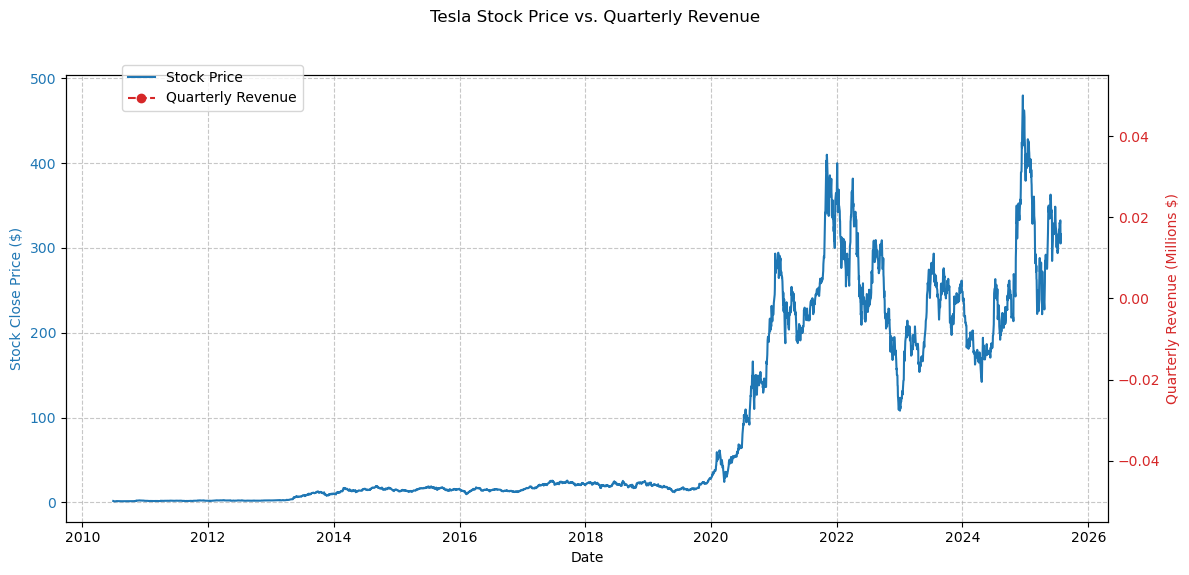

In [33]:

# Ensure 'Date' column in stock data is datetime for plotting
tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date'])

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Tesla Stock Close Price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price ($)', color=color)
ax1.plot(tesla_stock_data['Date'], tesla_stock_data['Close'], color=color, label='Stock Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Revenue
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Quarterly Revenue (Millions $)', color=color)
# Plot Tesla Revenue on the second y-axis
# We need to align revenue with stock data. Since revenue is quarterly, it will appear as distinct points.
# For better visualization, we can plot revenue as a bar chart or a line chart with markers.
# Using a line plot with markers for simplicity and to show trend over time.
ax2.plot(tesla_revenue.index, tesla_revenue['Revenue'], color=color, linestyle='--', marker='o', label='Quarterly Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legends
fig.suptitle('Tesla Stock Price vs. Quarterly Revenue')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Adjust legend position

# Improve layout
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [35]:
# --- Question 6: GameStop Stock and Revenue Dashboard ---
print("--- Question 6: GameStop Stock and Revenue Dashboard ---")

--- Question 6: GameStop Stock and Revenue Dashboard ---


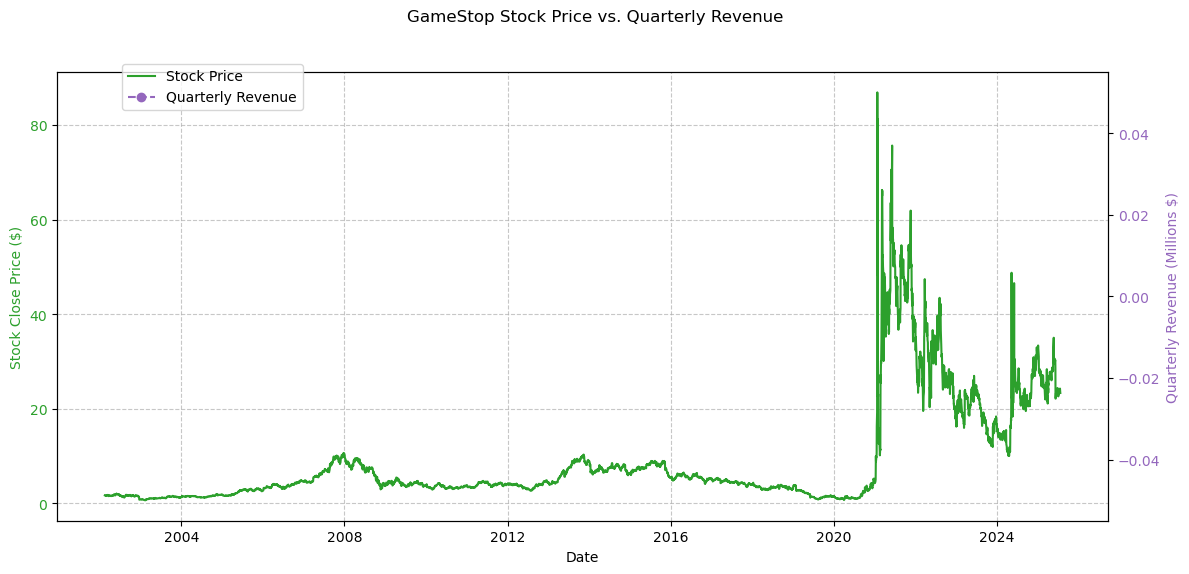

In [37]:
# Ensure 'Date' column in stock data is datetime for plotting
gamestop_stock_data['Date'] = pd.to_datetime(gamestop_stock_data['Date'])

# Create a figure and a set of subplots
fig_gme, ax1_gme = plt.subplots(figsize=(12, 6))

# Plot GameStop Stock Close Price on the first y-axis
color = 'tab:green'
ax1_gme.set_xlabel('Date')
ax1_gme.set_ylabel('Stock Close Price ($)', color=color)
ax1_gme.plot(gamestop_stock_data['Date'], gamestop_stock_data['Close'], color=color, label='Stock Price')
ax1_gme.tick_params(axis='y', labelcolor=color)
ax1_gme.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Revenue
ax2_gme = ax1_gme.twinx()
color = 'tab:purple'
ax2_gme.set_ylabel('Quarterly Revenue (Millions $)', color=color)
# Plot GameStop Revenue on the second y-axis
ax2_gme.plot(gamestop_revenue.index, gamestop_revenue['Revenue'], color=color, linestyle='--', marker='o', label='Quarterly Revenue')
ax2_gme.tick_params(axis='y', labelcolor=color)

# Add title and legends
fig_gme.suptitle('GameStop Stock Price vs. Quarterly Revenue')
fig_gme.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Adjust legend position

# Improve layout
fig_gme.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()